<a href="https://colab.research.google.com/github/Nakyung-Lee/finance_ML/blob/main/%EA%B8%88%EC%9C%B5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_4%EB%8B%A8%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 다팩터 모델

파이썬으로 다양한 팩터 모델 추정하기

모델의 기본 개념 : 하나 이상의 팩터(특징)를 사용해 특정 포트폴리오나 자산의 초과수익을 설명하는 것

위험팩터는 (예상) 수익의 단면을 이해하는 도구로 간주할 수 있다.

    리스트 팩터 기반 모델
      -> 실행가능한 투자전략이 되기 위해서 리스크 팩터는 반드시 양의 프리미엄을 만들어 낼 수 있어야 한다. 
      -> 이상적인 경우 이러한 리스크 팩터 프리미엄은 전통적인 자산군들이 제공하는 프리미엄보다 높다.
      -> 안정적인 프리미엄을 만들어내기 위해서 리스크 팩터는 반드시 그러한 프리미엄이 발생하는 것에 대한 합리적이고 건전한 경제적 논리를 가지고 있어야 한다.

팩터 모델의 사용 : 투자 포트폴리오에 추가될 수 있는 흥미로운 자산을 식별하는 데 사용, 포트폴리오의 실적 향상

## CAPM 구현

CAPM : 자본 자산 가격 모델

이 모델은 위험 자산에 대한 예상 수익률과 시장 위험(체계적 또는 분산 불가능한 위험) 간의 관계를 나타낸다. 

CAPM은 단일 팩터 모델로 간주할 수 있는데 그 위에 더 복잡한 팩터 모델을 구축 할 수 있다.

CAPM : E(ri) = rf + βi (E(rm) - rf)


E(ri) : 자산 i의 기대 수익률

Rf : 무위험 금리 (국고채 등)

E(Rm) : 시장의 기대 수익률 (베타 계수)

베타 : 시장 대비 자산 수익률의 민감도 수준, 이 값이 클수록 위험은 높아진다. 
 그러나 베타는 천차만별인 개별 종목들의 주가를 모두 설명하기에는 역부족

       beta <= -1 : 자산이 벤치 마크와 반대 방향, 벤치마크의 음수보다 더 큰 정도로 이동
       -1 < beta < 0 : 자산이 벤치 마크와 반대 방향으로 이동
       beta = 0 : 자산의 가격 변동과 시장 벤치 마크 사이에는 상관관계가 없다.
       0< beta <1 : 자산이 시장과 같은 방향으로 움직이지만 크기는 더 작다. 일별 변동에 크게 영향을 받지 않는 회사의 주식의 경우가 이에 해당된다.
       beta = 1 : 자산과 시장이 같은 방향으로 같은 크기로 이동한다. 
       beta > 1 : 자산이 시장과 같은 방향으로 더 큰 정도로 이동한다. 시장이 일상 뉴스에 매우 민감한 회사의 주식의 경우가 이에 해당된다.

CAPM : E(ri) - rf =βi (E(rm) - rf)

위의 방정식의 좌변은 위험 프리미엄으로 해석할 수 있으며 우변은 시장 프리미엄을 나타낸다.

β= cov(Ri,Rm)/var(Rm)

Ri=E(ri) - rf

Rm=E(rm) - rf

In [ ]:
#CAPM 구현
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!pip install yfinance

  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)
  Using cached lxml-4.8.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (6.4 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

In [ ]:
#위험 자산과 시간 구간 명시
RISKY_ASSET = 'AMZN'
MARKET_BENCHMARK = '^GSPC'
START_DATE = '2014-01-01'
END_DATE = '2018-12-31'

In [ ]:
#야후 파이낸스 데이터 다운로드
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

print(f'Downloaded {df.shape[0]} rows of data.')

Downloaded 1257 rows of data.


In [ ]:
#월별 최종 가격만 유지하고 월간 수익률을 연속된 관측값 사이의 백분율 변화로 계산
#월별 데이터로 리샘플링, 단순 수익률 계산

X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset', 
                                    MARKET_BENCHMARK: 'market'}) \
                   .resample('M') \
                   .last() \
                   .pct_change() \
                   .dropna()
X.head()

,asset,market
Date,,
2014-02-28,0.009507,0.043117
2014-03-31,-0.071058,0.006932
2014-04-30,-0.095847,0.006201
2014-05-31,0.027685,0.021030
2014-06-30,0.039130,0.019058


In [ ]:
#공분산 기법 사용 공분산과 벤치마크의 분산 비율 사이의 비율로 beta 계산
covariance = X.cov().iloc[0,1]
benchmark_variance = X.market.var()
beta = covariance / benchmark_variance
beta

1.6296083359501388

In [ ]:
#CAPM을 선형회귀로 추정
# 타깃(아마존의 주식 수익률)과 특징(S&P 500 수익률) 분리 
y = X.pop('asset')

'''
특징에 상수 열 추가 
이 회귀에 절편을 추가하는 것은 모형을 추정한 후 절편이 0인지 아닌지 조사하는 것)
이 값이 양수이고 유의하다면 CAPM 모델이 참이라는 가정하에 
자산이나 포트폴리오가 비정상적으로 높은 위험 조정 수익을 창출한다는 것을 의미
'''
X = sm.add_constant(X)

# 회귀분석 실행
capm_model = sm.OLS(y, X).fit()

# 요약 출력
print(capm_model.summary())

'''
결과 베타(market) : 1.62 
-> 아마존 수익률이 시장보다 약 62% 더 변동성이 있다는 의미
절편값은 상대적으로 작고 5% 유의 수준에서 통계적으로 유의하다. 

시장변수의 계수(1.62) = 자산과 시장 간의 공분산을 사용해 계산된 베타(1.62)
'''

                            OLS Regression Results                            
Dep. Variable:                  asset   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     32.77
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.05e-07
Time:                        05:14:10   Log-Likelihood:                 75.313
No. Observations:                  59   AIC:                            -146.6
Df Residuals:                      57   BIC:                            -142.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0178      0.009      1.950      0.0

위 예제에서 무위험 금리를 0으로 가정했는데 이는 최근 상황에서는 합리적인 가정

0이 아닌 무위험 금리 고려해야하는 경우 

      3가지 접근 방식
      1. 케네스 프렌치 교수의 웹 사이트 데이터 이용 
      2. 3개월 국채 사용 무위험 금리 추정
      3. FRED 데이터베이스 3개월 국채 사용 무위험 금리 추정

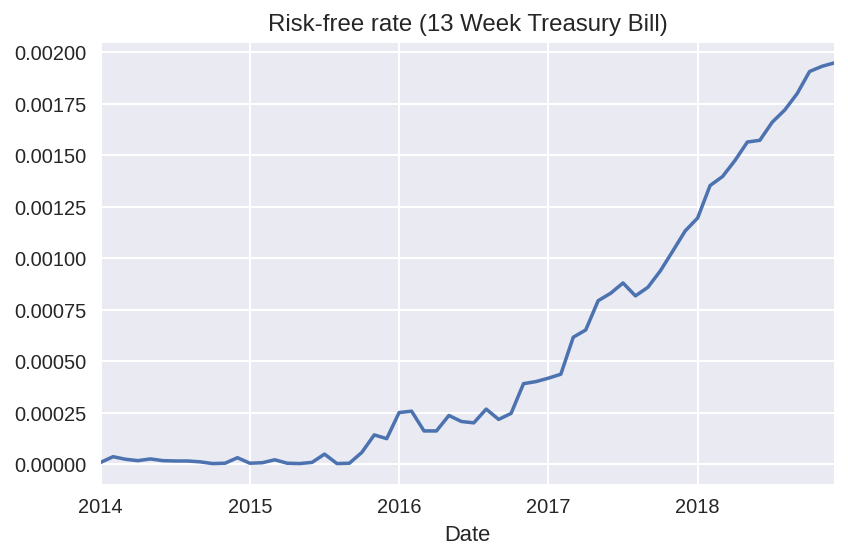

In [ ]:
# 무위험 금리 변환 방법

# 기간 일로 정의
N_DAYS = 90

# 데이터 다운로드
df_rf = yf.download('^IRX',
                    start=START_DATE,
                    end=END_DATE,
                    progress=False)

# 데이터 월간 주기로 리샘플링 (각 월의 마지막 값 취한다.)
rf = df_rf.resample('M').last().Close / 100

# 무위험 수익률(일별 값으로 표현) 계산, 월별로 변환 
rf = ( 1 / (1 - rf * N_DAYS / 360) )**(1 / N_DAYS)  

# 계산된 무위험 금리 계산
rf = (rf ** 30) - 1 

# plot the risk-free rate
rf.plot(title='Risk-free rate (13 Week Treasury Bill)')

plt.tight_layout()
# plt.savefig('images/ch4_im2.png')
plt.show()

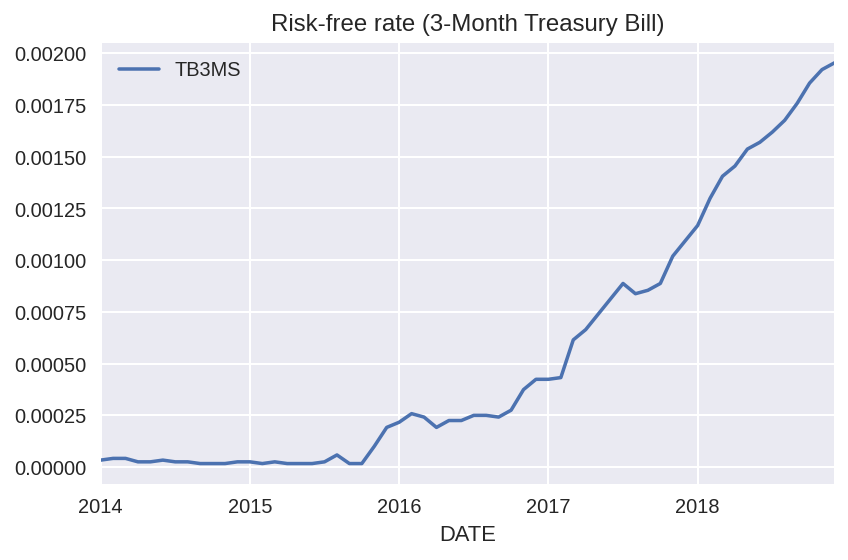

In [ ]:
import pandas_datareader.data as web

#FRED 데이터베이스에서 데이터 다운로드 
rf = web.DataReader('TB3MS', 'fred', start=START_DATE, end=END_DATE)

# 구한 무위험 금리를 월별 값으로 변환
rf = (1 + (rf / 100)) ** (1 / 12) - 1

# 계산된 무위험 금리 도식화
rf.plot(title='Risk-free rate (3-Month Treasury Bill)')

plt.tight_layout()
# plt.savefig('images/ch4_im3.png')
plt.show()

## 파마-프렌티 3-팩터 모델 구현

자산이나 포트폴리오의 초과 수익을 설명하는 두가지 팩터를 추가해 CAPM 모델 확장

고려된 팩터 : 시장팩터, 크기팩터,가치팩터

    시장 팩터 : CAPM과 유사한 시장의 초과 수익률 측정
    

크기 팩터 SMB
  
    시가 총액이 큰 주식 대비 시가 총액이 작은 주식의 초과 수익률 측정
    분류된 기준 하에 소형주에서 대형주의 성과를 뺀 격차를 말하는 것

가치 팩터 HML 
    
    성장 주식 대비 초과 가치 주식의 초과 수익률 측정
    High Value(Book Value 가 상대적으로 높은) 기업에서 낮은 기업의 성과를 뺀 지표
    가치 주식은 높은 시장가-대비-장부가 비율을 갖고 성장 주식은 그 비율이 낮다

SMB 지표가 클수록 소형주가 선전을, HML 지표가 높을수록 Value 기업들이  선전했다는 뜻

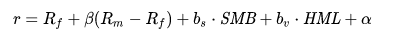

E(ri)는 자산 i에 대한 기대 수익률을 나타내고, rf는 무위험 금리이며 a는 절편이다. 상수 절편을 포함하는 이유는 값이 0인지 확인하기 위함

이를 통해 3-팩터 모델이 초과 수익률과 팩터 간의 관계를 정확하게 평가하는지 확인해준다. 

** 통계적으로 유의하고 0이 아닌 절편의 경우 모델이 자산/포트폴리오 수익률을 올바르게 평가하지 못할 수 있다. 

저자들은 통계적 검정을 통과하지 못한 경우에도 3-팩터 모델이 상당히 정확하다고 언급했다.

3-팩터 모델 구현

In [ ]:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf

In [ ]:
# 프렌치 교수 웹사이트에서 필요한 데이터 다운로드
!wget http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip

# unpack the zip
!unzip -a F-F_Research_Data_Factors_CSV.zip

# remove the zip
!rm F-F_Research_Data_Factors_CSV.zip

--2022-03-23 06:53:44--  http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip
Resolving mba.tuck.dartmouth.edu (mba.tuck.dartmouth.edu)... 129.170.171.144
Connecting to mba.tuck.dartmouth.edu (mba.tuck.dartmouth.edu)|129.170.171.144|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12587 (12K) [application/x-zip-compressed]
Saving to: ‘F-F_Research_Data_Factors_CSV.zip’

F-F_Research_Data_F 100%[===================>]  12.29K  --.-KB/s    in 0s      

2022-03-23 06:53:45 (413 MB/s) - ‘F-F_Research_Data_Factors_CSV.zip’ saved [12587/12587]

Archive:  F-F_Research_Data_Factors_CSV.zip
  inflating: F-F_Research_Data_Factors.CSV  [binary]


In [ ]:
#파라미터 정의
RISKY_ASSET = 'FB'
START_DATE = '2013-12-31'
END_DATE = '2018-12-31'

In [ ]:
# 데이터 로드 (데이터 경로 수정 필요)
factor_df = pd.read_csv('/content/F-F_Research_Data_Factors.CSV', skiprows=3)

# 월별데이터만 남긴다
STR_TO_MATCH = ' Annual Factors: January-December '
indices = factor_df.iloc[:, 0] == STR_TO_MATCH
start_of_annual = factor_df[indices].index[0]

factor_df = factor_df[factor_df.index < start_of_annual]

In [ ]:
# 데이터 프레임 열 이름 바꾼다 
factor_df.columns = ['date', 'mkt', 'smb', 'hml', 'rf']

# datetime 문자열로 변환
factor_df['date'] = pd.to_datetime(factor_df['date'], 
                                   format='%Y%m') \
                      .dt.strftime("%Y-%m")

# datetime 인덱스로 지정
factor_df = factor_df.set_index('date')

# 다음 날짜로 필터링
factor_df = factor_df.loc[START_DATE:END_DATE]

In [ ]:
#값 수치로 변환, 100으로 나눈다 (데이터 셋의 3.45는 실제로 3.45%)
factor_df = factor_df.apply(pd.to_numeric, 
                            errors='coerce') \
                     .div(100)
factor_df.head()

,mkt,smb,hml,rf
date,,,,
2014-01,-0.0332,0.0092,-0.0202,0.0
2014-02,0.0465,0.0037,-0.0031,0.0
2014-03,0.0043,-0.0187,0.0492,0.0
2014-04,-0.0019,-0.0420,0.0114,0.0
2014-05,0.0206,-0.0189,-0.0013,0.0


In [ ]:
# 위험 자산의 가격 다운로드
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 1258 rows of data.


In [ ]:
# 위험 자산에 대해 월별 수익률 계산 (월말 가격의 백분율 변화 계산)
y = asset_df['Adj Close'].resample('M') \
                         .last() \
                         .pct_change() \
                         .dropna()

y.index = y.index.strftime('%Y-%m')
y.name = 'rtn'
y.head()

Date
2014-01    0.144922
2014-02    0.094135
2014-03   -0.120070
2014-04   -0.007636
2014-05    0.058883
Name: rtn, dtype: float64

In [ ]:
#데이터셋 병합, 초과 수익률 계산
ff_data = factor_df.join(y)
ff_data['excess_rtn'] = ff_data.rtn - ff_data.rf

In [ ]:
# 회귀분석 실행 3-팩터 모델 추정

ff_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml', 
                   data=ff_data).fit()

# print results 
print(ff_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     5.066
Date:                Wed, 23 Mar 2022   Prob (F-statistic):            0.00357
Time:                        07:01:24   Log-Likelihood:                 88.254
No. Observations:                  60   AIC:                            -168.5
Df Residuals:                      56   BIC:                            -160.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0105      0.008      1.367      0.1

3-팩터 모델의 결과 해석 시 주의할 점

      1. 절편이 양이면서 통계적으로 유의한가?
      2. 어떤 팩터가 통계적으로 유의하며 방향성이 과거 결과나 가정들에 매칭되는가?

위의 경우 절편은 양이지만 5% 유의 수준에서 통계적으로 유의하지 않다. 

위험 팩터 중 SMB 팩터만 유의하지 않다.

회귀 요약에 제시된 F-통계량을 살펴보면 회귀의 공동 중요성을 검정할 수 있다.

귀무가설은 절편을 제외한 모든 특징의 계수 값이 0이라는 것이다.

해당 p-값이 0.00357이므로 5% 유의 수준에서 귀무가설을 기각할 이유가 있다.

### 추가사항

다른 방법으로는 pandas_datareader 기능 사용

-> 수작업 전처리 단계 피할 수 있다.

In [ ]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

ff_dict = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                         start='2014-01-01')

In [ ]:
ff_dict.keys()

dict_keys([0, 1, 'DESCR'])

In [ ]:
#데이터셋 설명
print(ff_dict['DESCR'])

F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202201 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2022 Kenneth R. French

  0 : (97 rows x 4 cols)
  1 : Annual Factors: January-December (8 rows x 4 cols)


In [ ]:
#월별 데이터셋
ff_dict[0].head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2014-01,-3.32,0.92,-2.02,0.0
2014-02,4.65,0.37,-0.31,0.0
2014-03,0.43,-1.87,4.92,0.0
2014-04,-0.19,-4.20,1.14,0.0
2014-05,2.06,-1.89,-0.13,0.0


위의 데이터를 보면 프렌치 교수 웹사이트에서 수동으로 다운로드 한 것과 같다.

## 자산 포트폴리오에 롤링 3-팩터 모델 구현

롤링 : 항상 일정한 크기(예제에서는 60개월)의 추정 윈도우를 고려하며 한 번에 한 주기씩 전체 데이터셋을 통해 롤링한다는 것

이러한 실험을 수행하는 이유 : 결과의 안정성을 테스트하기 위함

In [ ]:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf
import pandas_datareader.data as web

In [ ]:
ASSETS = ['AMZN', 'GOOG', 'AAPL', 'MSFT']
WEIGHTS = [0.25, 0.25, 0.25, 0.25]
START_DATE = '2009-12-31'
END_DATE = '2018-12-31'

In [ ]:
#팩터 관련 데이터 다운로드
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                                 start=START_DATE)[0]
df_three_factor = df_three_factor.div(100)
df_three_factor.index = df_three_factor.index.format()

In [ ]:
# 위험 자산 가격 다운로드
asset_df = yf.download(ASSETS,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 2264 rows of data.


In [ ]:
#위험 자산에 대한 월별 수익률 계산
asset_df = asset_df['Adj Close'].resample('M') \
                                .last() \
                                .pct_change() \
                                .dropna()
# reformat index for joining
asset_df.index = asset_df.index.strftime('%Y-%m')

In [ ]:
#포트폴리오 수익률 계산
import numpy as np
asset_df['portfolio_returns'] = np.matmul(asset_df[ASSETS].values, 
                                          WEIGHTS)
asset_df.head()

,AAPL,AMZN,GOOG,MSFT,portfolio_returns
Date,,,,,
2010-01,-0.088597,-0.067722,-0.145231,-0.075459,-0.094252
2010-02,0.065396,-0.055897,-0.005925,0.022146,0.006430
2010-03,0.148470,0.146706,0.076538,0.021625,0.098335
2010-04,0.111021,0.009796,-0.073036,0.042677,0.022615
2010-05,-0.016125,-0.084902,-0.076222,-0.151394,-0.082161


In [ ]:
#데이터셋 병합
ff_data=asset_df.join(df_three_factor).drop(ASSETS,axis=1)
ff_data.columns=['portf_rtn','mkt','smb','hml','rf']
ff_data['portf_ex_rtn']=ff_data.portf_rtn - ff_data.rf

In [ ]:
ff_data.head()

,portf_rtn,mkt,smb,hml,rf,portf_ex_rtn
Date,,,,,,
2010-01,-0.094252,-0.0336,0.0040,0.0043,0.0000,-0.094252
2010-02,0.006430,0.0340,0.0119,0.0322,0.0000,0.006430
2010-03,0.098335,0.0631,0.0148,0.0221,0.0001,0.098235
2010-04,0.022615,0.0200,0.0487,0.0289,0.0001,0.022515
2010-05,-0.082161,-0.0789,0.0009,-0.0244,0.0001,-0.082261


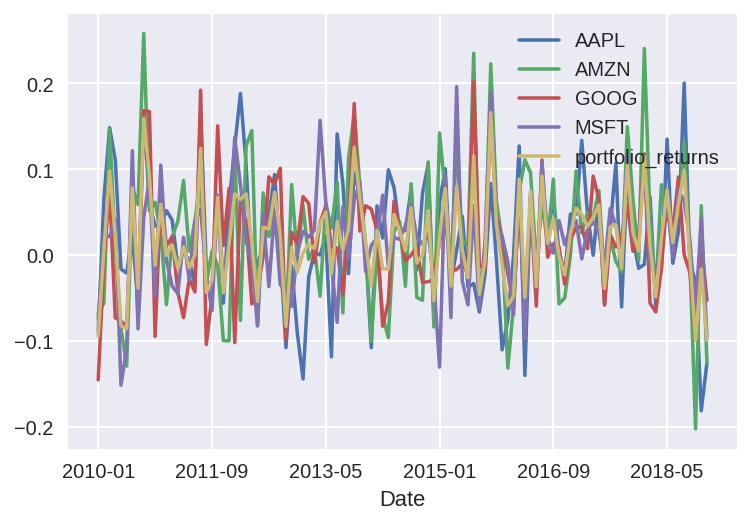

In [ ]:
asset_df.plot()

In [ ]:
#롤링 n-팩터 모델의 함수 정의
def rolling_factor_model(input_data, formula, window_size):
    '''
    Function for estimating the Fama-French (n-factor) model using a rolling window of fixed size.
    
    Parameters
    ------------
    input_data : pd.DataFrame
        A DataFrame containing the factors and asset/portfolio returns
    formula : str
        `statsmodels` compatible formula representing the OLS regression  
    window_size : int
        Rolling window length.
    
    Returns
    -----------
    coeffs_df : pd.DataFrame
        DataFrame containing the intercept and the three factors for each iteration.
    '''

    coeffs = []

    #입력 데이터프레임 적절히 슬라이스, 60개월 앞으로 모델을 추정, 항상 전체 관측 윈도우 확보할 수 있도록 한다.
    for start_index in range(len(input_data) - window_size + 1):        
        end_index = start_index + window_size

        # define and fit the regression model 
        ff_model = smf.ols(
            formula=formula, 
            data=input_data[start_index:end_index]
        ).fit()
   
        # store coefficients
        coeffs.append(ff_model.params)
    
    coeffs_df = pd.DataFrame(
        coeffs, 
        index=input_data.index[window_size - 1:]
    )

    return coeffs_df

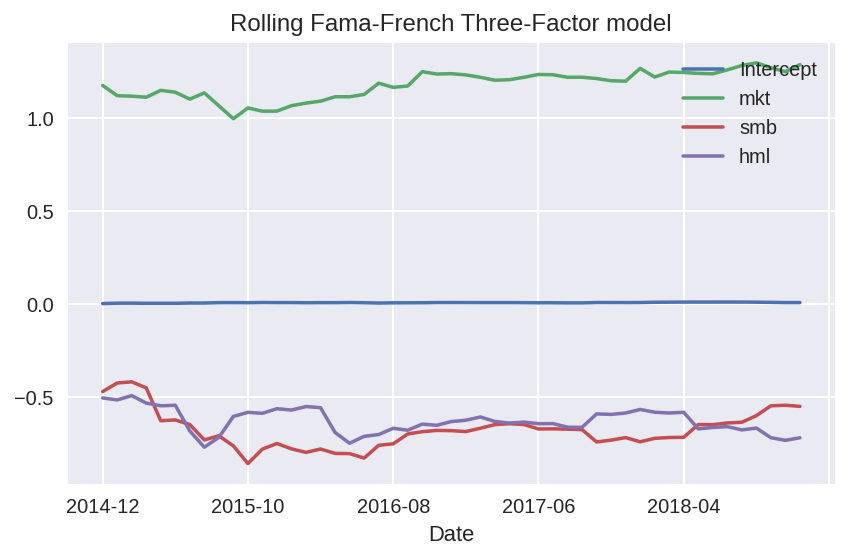

In [ ]:
#롤링 3-팩터 모델을 추정하고 결과 도식화
MODEL_FORMULA = 'portf_ex_rtn ~ mkt + smb + hml'
results_df = rolling_factor_model(ff_data, 
                                  MODEL_FORMULA, 
                                  window_size=60)
results_df.plot(title = 'Rolling Fama-French Three-Factor model')

plt.tight_layout()
# plt.savefig('images/ch4_im8.png')
plt.show()

- 절편(intercept)은 거의 상수 이며 0에 가깝다.
- 팩터에 약간의 변동성이 있지만 갑작스러운 반전이나 예상치 못한 점프는 없다.

 주식 등 위험자산의 기대수익률을 산출하는 CAPM 

 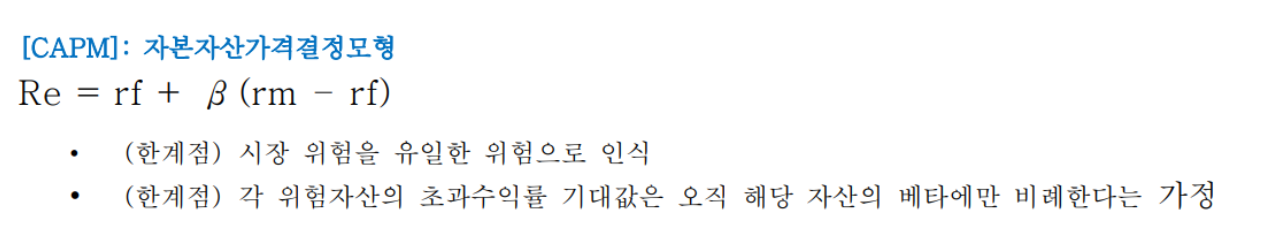

      기대수익률 = 무위험수익률 + (시장기대수익률 – 무위험수익률)*베타값    
      베타값은 시장 변동성에 대한 일종의 민감도 값이 클수록 위험 및 기대수익률 높아진다. 
      문제점 : 개별종목의 들쑥날쑥 한 수익률을 설명하기 어렵다.
               개별종목마다 각기 다른 베타값을 설명하기 역부족


Fama French Three Factor Model
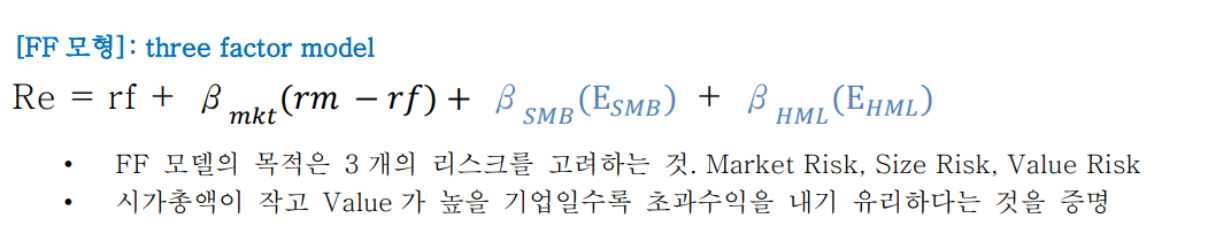
      
      변수(3가지 Factor) :시장, Size, Value

## 4-팩터와 5-팩터 모델 구현

카하트의 4-팩터 모델 

      기본 가정 : 단기간에는 승자 주식은 승자로 남고 패자는 패자로 남는다.
      (승자, 패자 분류 기준 : ex) 과거 12개월 누적 총 수익률)
      두 그룹 식별 후 특정 보유 기간 내에 승자 매수, 패자 매도

모멘텀 팩터

      과거 12개월 동안의 패자 주식에 대하 승자 주식의 초과 수익을 측정한다. 

파마-프렌치의 5-팩터 모델

      파마와 프렌치 그들의 3-팩터 모델에 두 가지 팩터 추가해 확장
      - RMW : 이윤이 낮은 회사에 비해 이윤이 높은 회사의 초과 수익률 측정
      - CMA : 저투자 정책 회사의 중급 이상 투자 정책회사 대비 초과 이익률 측정

모든 팩터 모델에서처럼 위험 팩터에 대한 노출이 예상 수익 대비 모든 가능한 변동을 포착하는 경우에 모든 자산/포트폴리오의 절편 값은 0이어야 한다.

4-팩터, 5-팩터 모델 구현

In [ ]:
import pandas as pd
import yfinance as yf
import statsmodels.formula.api as smf
import pandas_datareader.data as web

In [ ]:
#위험 자산과 시간 구간 설정
ISKY_ASSET = 'AMZN'
START_DATE = '2013-12-31'
END_DATE = '2018-12-31'

In [ ]:
#프렌치 교수 웹사이트 위험 팩터 다운로드
# 3-팩터
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                                 start=START_DATE)[0]
df_three_factor.index = df_three_factor.index.format()

# 모멘텀 팩터
df_mom = web.DataReader('F-F_Momentum_Factor', 'famafrench', 
                        start=START_DATE)[0]
df_mom.index = df_mom.index.format()

# 5-팩터
df_five_factor = web.DataReader('F-F_Research_Data_5_Factors_2x3', 
                                'famafrench', 
                                start=START_DATE)[0]
df_five_factor.index = df_five_factor.index.format()

In [ ]:
#위험 자산 데이터 다운로드
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)

print(f'Downloaded {asset_df.shape[0]} rows of data.')

Downloaded 1258 rows of data.


In [ ]:
#월별 수익률 계산
y = asset_df['Adj Close'].resample('M') \
                         .last() \
                         .pct_change() \
                         .dropna()

y.index = y.index.strftime('%Y-%m')
y.name = 'return'

In [ ]:
#4-팩터 요인 위한 데이터셋 병합
# join all datasets on the index
four_factor_data = df_three_factor.join(df_mom).join(y)

# 열 이름 바꾸기
four_factor_data.columns = ['mkt', 'smb', 'hml', 'rf', 'mom', 'rtn']

# 모든 것(수익률 제외)을 100으로 나눔
four_factor_data.loc[:, four_factor_data.columns != 'rtn'] /= 100

print(four_factor_data.index)

Index(['2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05',
       '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11',
       '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05',
       '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11',
       '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
       '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
       '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05',
       '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11',
       '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
       '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
       '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05',
       '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
       '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05',
       '2020-06', '2020-07', '2020-08', '2020-09', 

In [ ]:
# 인덱스를 datetime으로 변환
#four_factor_data.index = pd.to_datetime((four_factor_data.index),format='%Y-%m')

# 관심 대상 기간 설정
four_factor_data = four_factor_data.loc[START_DATE:END_DATE]

# 초과 수익률 계산
four_factor_data['excess_rtn'] = four_factor_data.rtn - four_factor_data.rf

four_factor_data.head()

,mkt,smb,hml,rf,mom,rtn,excess_rtn
2014-01,-0.0332,0.0092,-0.0202,0.0,0.0171,0.144922,0.144922
2014-02,0.0465,0.0037,-0.0031,0.0,0.0207,0.094135,0.094135
2014-03,0.0043,-0.0187,0.0492,0.0,-0.0329,-0.120070,-0.120070
2014-04,-0.0019,-0.0420,0.0114,0.0,-0.0389,-0.007636,-0.007636
2014-05,0.0206,-0.0189,-0.0013,0.0,0.0088,0.058883,0.058883


In [ ]:
# join all datasets on the index
five_factor_data = df_five_factor.join(y)

# rename columns
five_factor_data.columns = ['mkt', 'smb', 'hml', 'rmw', 'cma', 'rf', 'rtn']

# divide everything (except returns) by 100
five_factor_data.loc[:, five_factor_data.columns != 'rtn'] /= 100

# convert index to datetime
#five_factor_data.index = pd.to_datetime(five_factor_data.index,format='%Y-%m')

# 관심 대상 기간 설정
five_factor_data = five_factor_data.loc[START_DATE:END_DATE]

# 초과 수익률 계산
five_factor_data['excess_rtn'] = five_factor_data.rtn - five_factor_data.rf

five_factor_data.head()

,mkt,smb,hml,rmw,cma,rf,rtn,excess_rtn
2014-01,-0.0332,0.0059,-0.0202,-0.0388,-0.0143,0.0,0.144922,0.144922
2014-02,0.0465,0.0016,-0.0031,-0.0023,-0.0048,0.0,0.094135,0.094135
2014-03,0.0043,-0.0113,0.0492,0.0211,0.0198,0.0,-0.120070,-0.120070
2014-04,-0.0019,-0.0413,0.0114,0.0345,0.0103,0.0,-0.007636,-0.007636
2014-05,0.0206,-0.0189,-0.0013,0.0005,-0.0101,0.0,0.058883,0.058883


In [ ]:
four_factor_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml + mom', 
                            data=four_factor_data).fit()

print(four_factor_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     4.153
Date:                Wed, 23 Mar 2022   Prob (F-statistic):            0.00520
Time:                        09:08:08   Log-Likelihood:                 88.968
No. Observations:                  60   AIC:                            -167.9
Df Residuals:                      55   BIC:                            -157.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0096      0.008      1.256      0.2

In [ ]:
five_factor_model = smf.ols(
    formula='excess_rtn ~ mkt + smb + hml + rmw + cma', 
    data=five_factor_data
).fit()

print(five_factor_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     4.881
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           0.000934
Time:                        09:08:23   Log-Likelihood:                 92.238
No. Observations:                  60   AIC:                            -172.5
Df Residuals:                      54   BIC:                            -159.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0110      0.007      1.500      0.1

5-팩터 모델에 따르면 아마존의 초과 수익률은 대부분의 팩터로부터 (시장 팩터 제외) 부정적인 영향을 받았다.

여기에 계수를 해석하는 예시를 보면 

      시장 팩터가 1% 포인트 증가하면 0.015pp가 증가한다.
      시장팩터에 의한 수익률 상황에서는 우리의 포트폴리오(아마존주식)는 무위험 금리 대비 1.5508*1% 초과한 수익률을 예상할 수 있다.
      